<a href="https://colab.research.google.com/github/RahulSinghWaldia/NETFLIX-MOVIES-TV-SHOWS-CLUSTERING/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:

# For example, here's several helpful packages to load in 
!pip install imdbpy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly as pl
import plotly.graph_objs as gobj
import pandas as pd
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot


import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import random

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [ ]:
import imdb
df = pd.read_csv(r'/content/sample_data/NETFLIX CLUSTERING.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,4.1,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,5.2,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,8.2,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,6.4,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,5.7,99 min,Comedies,When nerdy high schooler Dani finally attracts...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,7.2,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,6.1,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,4.9,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
8,80117902,TV Show,Fire Chasers,NaN,bam,United States,"September 8, 2017",2017,6.9,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,5.6,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [ ]:
#create a dictionary of show_id and titles to be used later
showNames = pd.Series(df.title.values,index=df.show_id).to_dict()

def filmPredict(title):
    print(showNames[(title)])
    
filmPredict(81145628)
filmPredict(81035887)
filmPredict(80232095)
filmPredict(80108610)

Norm of the North: King Sized Adventure
Monopoly (The Bank Of Luck)
Mexicanos de Bronce
Bugs


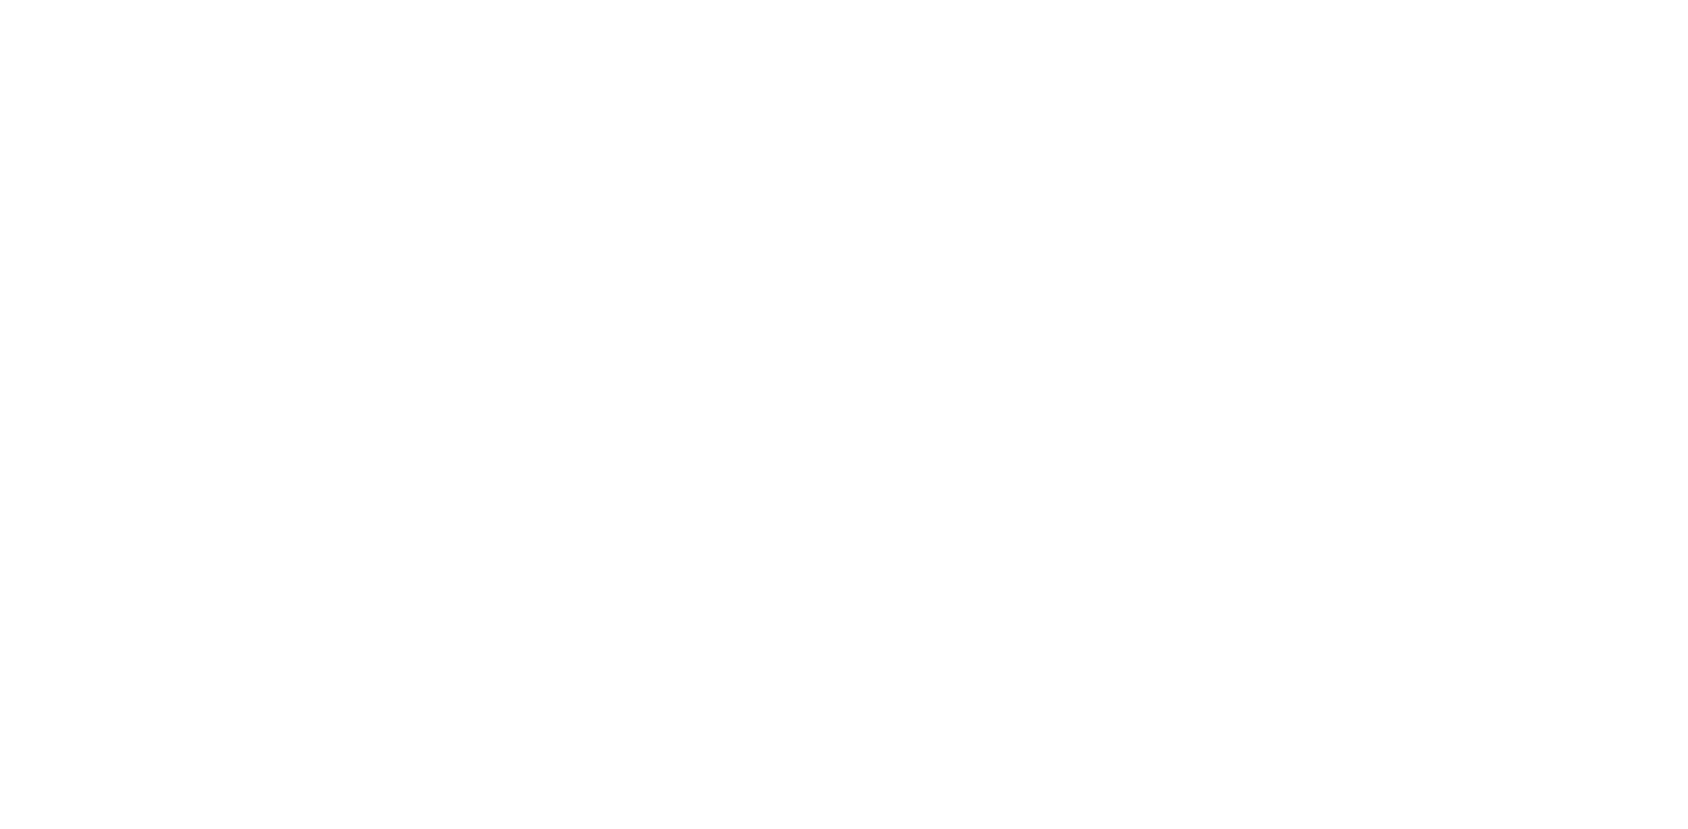

In [ ]:
import collections
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import pandas as pd 

col = "listed_in"
categories = ", ".join(df['listed_in']).split(", ")
counter_list = collections.Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()


number_of_colors = len(labels)

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
#print(color)
fig = plt.figure(figsize=(30,15))

plt.axis('off')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       6234 non-null   int64  
 1   type          6234 non-null   object 
 2   title         6234 non-null   object 
 3   director      4265 non-null   object 
 4   cast          6234 non-null   object 
 5   country       6234 non-null   object 
 6   date_added    6223 non-null   object 
 7   release_year  6234 non-null   int64  
 8   rating        6234 non-null   float64
 9   duration      6234 non-null   object 
 10  listed_in     6234 non-null   object 
 11  description   6234 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 584.6+ KB


In [ ]:
#same with countries


col = "country"
df['country'] = df.country.fillna('none')
categories = ", ".join(df['country']).split(",")

counter_list = collections.Counter(categories).most_common(50)
counter_list = counter_list[1:50]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Most common actors", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

import plotly.express as px


#try to do one for other countriesp

labels

#make an interactive pie chart and countries with less than 20 make as 'other'

df1 = {'Country':labels,'number':values}
df1 = pd.DataFrame(df1)
df1.loc[df1['number'] < 50, 'Country'] = 'Other countries' 
fig = px.pie(df1, values='number', names='Country', color_discrete_sequence=px.colors.cyclical.Phase)
fig.show()


#initializing the data variable
data = dict(type = 'choropleth',
            
            locations = labels,
            locationmode = 'country names',
            colorscale= 'Portland',
            
            text= labels,
            z=values,
            colorbar = {'title':'Country Colours', 'len':200,'lenmode':'pixels' })

layout = dict(geo = {'scope':'world'}, title_text ='Netflix shows in each country')

col_map = gobj.Figure(data = [data],layout = layout)

iplot(col_map)

In [ ]:
col = "cast"
df['cast'] = df.cast.fillna('bam')
categories = ", ".join(df['cast']).split(", ")

counter_list = collections.Counter(categories).most_common(50)
counter_list = counter_list[1:50]
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Most common actors", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()
print(len(categories))


44881


In [ ]:
#create a function for putting in name of actor and getting films/shows they are in 

actorDictionary = {}
counter_list = collections.Counter(categories).most_common(1000)
counter_list = counter_list[1:1000]
Actors = [_[0] for _ in counter_list][::-1]
justActors = pd.DataFrame()
justActors['title'] = df['title']
justActors['cast'] = df['cast']



#cycle through the labels and if they - i know its the worst fofrmula ever
count = 0
for cols, rows in justActors.iterrows():
    for actor in Actors:
        if actor in (rows[1]):
            actorDictionary.setdefault(actor, []).append(rows[0])
            count+=1

actorDictionary
print(count)


7735


In [ ]:
def findFilms(name):
    x = actorDictionary[name]
    print(x)
    

findFilms('Ricky Gervais')
findFilms('Nicolas Cage')
findFilms('Brad Pitt')

['After Life', 'Ricky Gervais: Humanity', 'The Invention of Lying', 'Spy Kids: All the Time in the World', 'David Brent: Life on the Road', 'The Little Prince', 'Special Correspondents', 'Extras', 'Derek']
['The Runner', 'USS Indianapolis: Men of Courage', 'Knowing', 'World Trade Center', 'G-Force', 'Inconceivable', 'Spider-Man: Into the Spider-Verse', 'National Treasure', 'The Croods', 'Next', 'Ghost Rider', 'Dog Eat Dog', 'Left Behind', 'The Humanity Bureau', 'Between Worlds', 'Season of the Witch', 'The Trust']
["Ocean's Thirteen", "Ocean's Twelve", 'Troy', 'A Stoning in Fulham County', 'War Machine', 'Inglourious Basterds', 'Babel']


In [ ]:
import imdb

ia = imdb.IMDb()

movies = ia.search_movie('matrix')
movies[0]

for k,v in movies[0].items():
    print(k,v)

title The Matrix
kind movie
year 1999
cover url https://m.media-amazon.com/images/M/MV5BNzQzOTk3OTAtNDQ0Zi00ZTVkLWI0MTEtMDllZjNkYzNjNTc4L2ltYWdlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_UX32_CR0,0,32,44_AL_.jpg
canonical title Matrix, The
long imdb title The Matrix (1999)
long imdb canonical title Matrix, The (1999)
smart canonical title Matrix, The
smart long imdb canonical title Matrix, The (1999)
full-size cover url https://m.media-amazon.com/images/M/MV5BNzQzOTk3OTAtNDQ0Zi00ZTVkLWI0MTEtMDllZjNkYzNjNTc4L2ltYWdlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@.jpg


In [ ]:
movie = movies[0]

ia.update(movie, info=['taglines','vote details'])

#create function for retriveing ratings

def rating(name):
    name = str(name)
    movies = ia.search_movie(name)
    movie = movies[0]
    ia.update(movie, info=['taglines','vote details'])
    rating = movie['arithmetic mean']
    return (rating)


def rating_test(name):
    try:
        x = rating(name)
        return(x)
    
    except:
         x = 0
         return(x)
        
x = rating_test('Babel')
print(x)

7.4


In [ ]:
okk = df['title'][3]
rating_test(okk)

6.3

In [ ]:
#only run once to get imdb ratings

#df['rating'] = df['title'].apply(rating_test)
#df.head(10)

#df.to_csv('mycsvfile.csv',index=False)
df = pd.read_csv(r'/content/sample_data/NETFLIX CLUSTERING.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,4.1,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,5.2,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,8.2,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,6.4,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,5.7,99 min,Comedies,When nerdy high schooler Dani finally attracts...


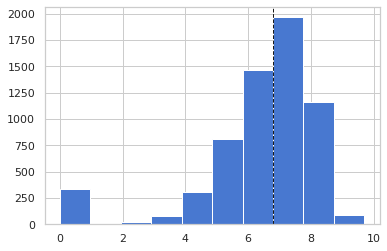

999

In [ ]:
#df.rating.plot()
plt.hist(df['rating'])

#so most movies on netflix have a rating of 

x = df['rating'].median()
plt.axvline(x, color='k', linestyle='dashed', linewidth=1)
#plt.line(y=6.4)
plt.show()
len(actorDictionary)

In [ ]:
ratingDic = {}

hay = df['title'].tolist()
hay = pd.Series(df.rating.values,index=df.title).to_dict()
    
hay

count = 0

In [ ]:
#create a dictionary for average imdb score for each actor to find which actors are in the best films - do similiar for genre etc - then think of how to cluster the categrical data
actorMean = {}

for k,v in actorDictionary.items():
    count = 0
    for i in v:
        count += hay[i]
    actorMean[k] = (count/len(v))

    
actorMean
#sort by highest first 
sort = {k: v for k, v in sorted(actorMean.items(), key=lambda item: item[1])}
dfRate = pd.DataFrame.from_dict(sort.items())
#df.sort_values(by=[1])

title = ['actor','mean']
dfRate.columns = title
dfRate.info()

#df.sort_values(by = ['mean', 'actor'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   actor   999 non-null    object 
 1   mean    999 non-null    float64
dtypes: float64(1), object(1)
memory usage: 15.7+ KB


In [ ]:
counter_list = dfRate.tail(50)
counter_list

labels = counter_list['actor']
values = counter_list['mean']
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Actors with the highest average ratings", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()
print(len(categories))

44881


In [ ]:
def findIMDBaverage(name):
    ave = actorMean[name]
    return(ave)

#example
findIMDBaverage('Keanu Reeves')

6.581818181818182

In [ ]:
#do the same for genre? or try to create a model/cluster to find other films someone might like based on what they liked previously. 

dfCopy = df
#only keep columns you want for algorith
dfCopy.head()
dfCopy['director'] = dfCopy.director.fillna('MR')

dfCopy['director3'], dfCopy['director2'] = dfCopy['director'].str.split(',',1).str
dfCopy.head()

dfCopy["director3"] = dfCopy["director3"].astype('category')
dfCopy["directorCode2"] = dfCopy["director3"].cat.codes
dfCopy = dfCopy.replace(-1,1)
dfCopy.head()
dfCopy["listed_in"] = dfCopy["listed_in"].astype('category')
dfCopy["genreCombo"] = dfCopy["listed_in"].cat.codes
dfCopy.head()
#dfCopy["genreCombo"].value_counts()

dfCopy["country"] = dfCopy["country"].astype('category')
dfCopy["country1"] = dfCopy["country"].cat.codes
dfCopy = dfCopy.set_index('show_id')
scalerValues = dfCopy.drop('type', axis=1) 
scalerValues = scalerValues.drop('title', axis=1) 
scalerValues = scalerValues.drop('director', axis=1) 
scalerValues = scalerValues.drop('cast', axis=1) 
scalerValues = scalerValues.drop('date_added', axis=1) 
scalerValues = scalerValues.drop('duration', axis=1) 
scalerValues = scalerValues.drop('listed_in', axis=1) 
scalerValues = scalerValues.drop('description', axis=1) 
scalerValues = scalerValues.drop('director2', axis=1) 
scalerValues = scalerValues.drop('director3', axis=1) 
scalerValues = scalerValues.drop('country', axis=1) 

scalerValues.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning:

Columnar iteration over characters will be deprecated in future releases.



,release_year,rating,directorCode2,genreCombo,country1
show_id,,,,,
81145628,2019,4.1,2472,110,498
80117401,2016,5.2,1777,420,379
70234439,2013,8.2,1777,381,443
80058654,2016,6.4,1777,381,443
80125979,2017,5.7,915,167,443


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   release_year   6234 non-null   float64
 1   rating         6234 non-null   float64
 2   directorCode2  6234 non-null   float64
 3   genreCombo     6234 non-null   float64
 4   country1       6234 non-null   float64
dtypes: float64(5)
memory usage: 243.6 KB


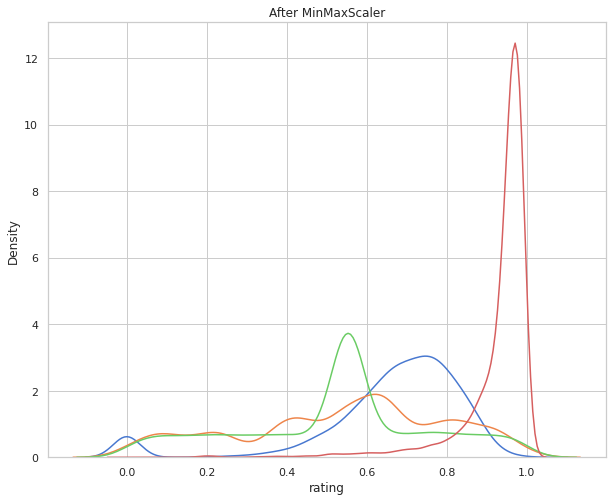

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

col_names = list(scalerValues.columns)


mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(scalerValues)

scalerValues = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(scalerValues['rating'], ax=ax1)

sns.kdeplot(scalerValues['genreCombo'], ax=ax1)
sns.kdeplot(scalerValues['directorCode2'], ax=ax1)
sns.kdeplot(scalerValues['release_year'], ax=ax1)
scalerValues.info()

[0.31466915 0.26161196 0.23573813 0.1543704  0.03361035]


,release_year,rating,directorCode2,genreCombo,country1
0,0.989474,0.422680,0.770333,0.239130,0.898917
1,0.957895,0.536082,0.553755,0.913043,0.684116
2,0.926316,0.845361,0.553755,0.828261,0.799639
3,0.957895,0.659794,0.553755,0.828261,0.799639
4,0.968421,0.587629,0.285136,0.363043,0.799639


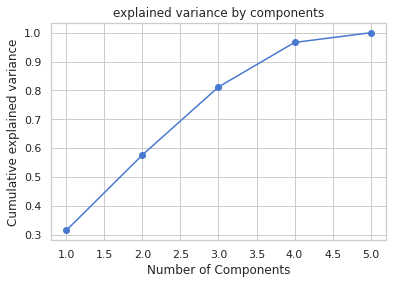

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
X = scalerValues

pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

#pca.info()
plt.plot(range(1,6),pca.explained_variance_ratio_.cumsum(),marker='o')
plt.title("explained variance by components")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative explained variance')

scalerValues.head()

In [ ]:
#we keep 3 pc's beause this give 80% of the variance

pca = PCA(n_components=3)
pca.fit(X)
scores_PCA = pca.transform(X)

#sum of squares
#we potentially want a lot of clusters so im going to say up to 100
sos = []
for i in range(1,100):
    kmeans_pca = KMeans(n_clusters = i,init ='k-means++',random_state=200)
    kmeans_pca.fit(scores_PCA)
    sos.append(kmeans_pca.inertia_)

Text(0.5, 1.0, 'k-meas with PCA clusterinn')

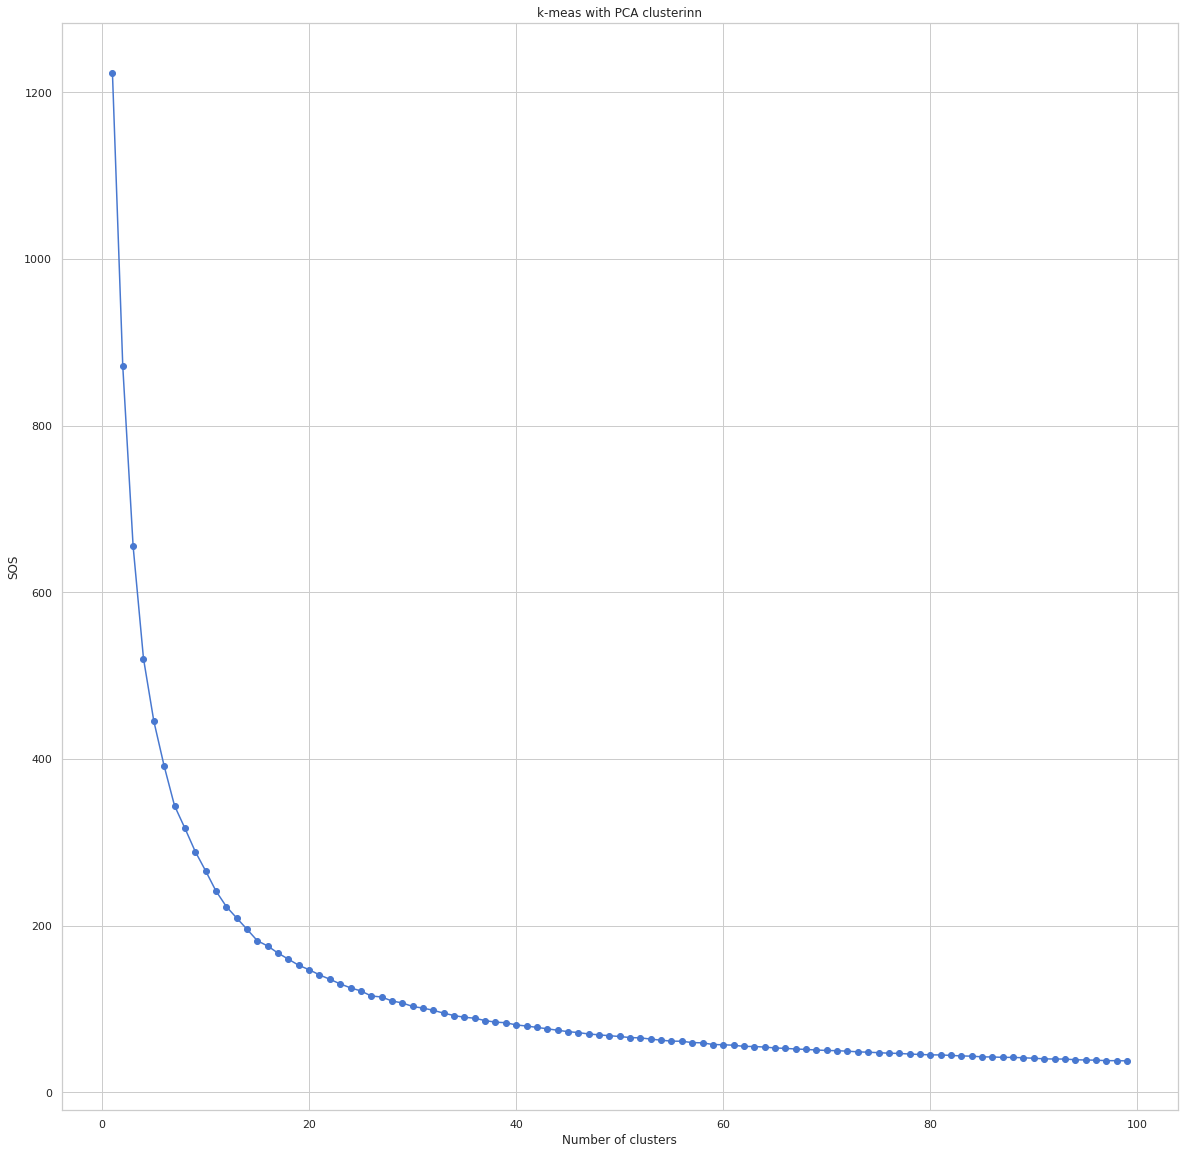

In [ ]:
plt.figure(figsize=(20,20))
plt.plot(range(1,100),sos,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SOS')
plt.title('k-meas with PCA clusterinn')

In [ ]:
#gonna go for 20 because i know i want a lot of clusters 

kmeans_pca = KMeans(n_clusters=10,init='k-means++',random_state=42)
kmeans_pca.fit(scores_PCA)

Z = kmeans_pca.predict(scores_PCA)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



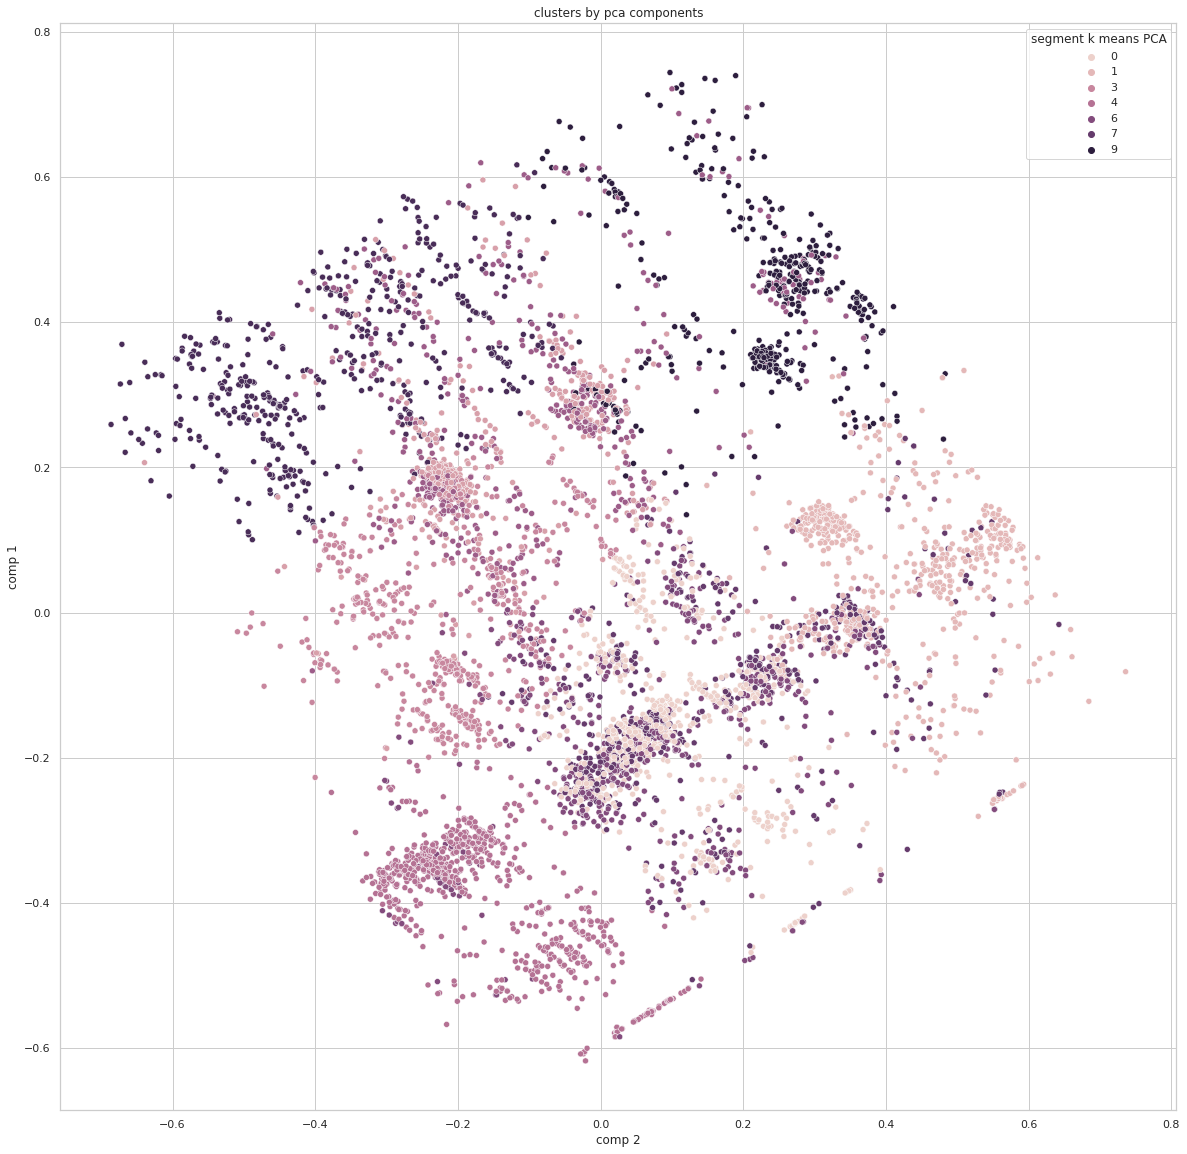

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 81145628 to 70153404
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   release_year         6234 non-null   float64
 1   rating               6234 non-null   float64
 2   directorCode2        6234 non-null   float64
 3   genreCombo           6234 non-null   float64
 4   country1             6234 non-null   float64
 5   comp 1               6234 non-null   float64
 6   comp 2               6234 non-null   float64
 7   comp 3               6234 non-null   float64
 8   segment k means PCA  6234 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 462.7 KB


In [ ]:
#next task create a word frequency graph with description column

df_kmeans = pd.concat([X,pd.DataFrame(scores_PCA)],axis=1)
df_kmeans.columns.values[-3:]=['comp 1','comp 2','comp 3']
df_kmeans['segment k means PCA'] = kmeans_pca.labels_

df_kmeans = df_kmeans.set_index(df['show_id'])
df_kmeans.head()

x_axis = df_kmeans['comp 2']
y_axis = df_kmeans['comp 1']
plt.figure(figsize=(20,20))
sns.scatterplot(x_axis,y_axis,hue=df_kmeans['segment k means PCA'])
plt.title('clusters by pca components')
plt.show()


df_kmeans.info()

In [ ]:
!pip install chart_studio
!pip install plotly
import glob
import numpy as np
import pandas as pd
import chart_studio
import plotly
#import plotly.plotly as py
#import chart_studio.plotly as py
import plotly.graph_objs as pgo
import chart_studio.plotly as py
#import chart_studio.plotly as py


chart_studio.tools.set_credentials_file(username='sarahjeeeze', api_key='SvTKCDpH5TQ7aCJuROxR')

trace0 = pgo.Scatter(x=df_kmeans['comp 2'],
                    y=df_kmeans['comp 1'],
                    text=df_kmeans.index,
                    mode='markers',
                    # Size by total population of each neighborhood. 
                    marker=plotly.graph_objs.scatter.Marker(size=df_kmeans['rating'],
                                      sizemode='diameter',
                                      sizeref=df_kmeans['rating'].max()/5,
                                      opacity=0.5,
                                     color=Z
                                                       ))
model = kmeans_pca
n_cluster = 10

# Represent cluster centers.
trace1 = pgo.Scatter(x=model.cluster_centers_[:, 0],
                     y=model.cluster_centers_[:, 1],
                     name='',
                     mode='markers',
                     marker=pgo.Marker(symbol='x',
                                       size=12,
                                      ),
                     
                     showlegend=False
)

layout5 = pgo.Layout(title='Baltimore Vital Signs (PCA)',
                     xaxis=pgo.XAxis(showgrid=False,
                                     zeroline=False,
                                     showticklabels=False),
                     yaxis=pgo.YAxis(showgrid=False,
                                     zeroline=False,
                                     showticklabels=False),
                     hovermode='closest'
)
datad = pgo.Data([trace0, trace1])
layout7 = layout5
layout7['title'] = 'Netflix  in 10 clustsers)'
fig7 = pgo.Figure(data=datad, layout=layout7)
py.iplot(fig7, filename='baltimore-cluster-map')

     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=d94374e1101db758ffda3d98af271d2f0b2ecdba0a5b8509d392a5539135c22a
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:550: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:578: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
P

Conclusions

We have drawn many interesting inferences from the dataset Netflix titles; here’s a summary of the few of them:
The most content type on Netflix is movies,
The popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been increasing significantly,
The country by the amount of the produces content is the United States,
The most popular director on Netflix , with the most titles, is Jan Suter.
International Movies is a genre that is mostly in Netflix,
The largest count of Netflix content is made with a “TV-14” rating,
The most popular actor on Netflix TV Shows based on the number of titles is Takahiro Sakurai,
The most popular actor on Netflix movie, based on the number of titles, is Anupam Kher.